In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

import sympy as sp
from sympy import *
from IPython.display import display, Latex


D = lambda f, x : (np.array(diff(f(x), Matrix(x))).T)[0]
def pr(T):
    if len(np.shape(T))==1:
        return display(Latex("$$" + sp.latex(Matrix(T)) +"$$"))
    elif len(np.shape(T))==2:
        return display(Latex("$$" + sp.latex(Matrix(T)) +"$$"))
    else:
        return display(Latex("$$" + sp.latex(T) +"$$"))

def smp(A, f=simplify):
    n, m = np.shape(A)
    B = np.empty_like(A)
    for i in range(n):
        for j in range(m):
            B[i, j] = f(A[i,j])
    return B

def smp2(A, f=simplify):
    n  = np.shape(A)[0]
    B = np.empty_like(A)
    for i in range(n):
        B[i] = f(A[i])
    return B

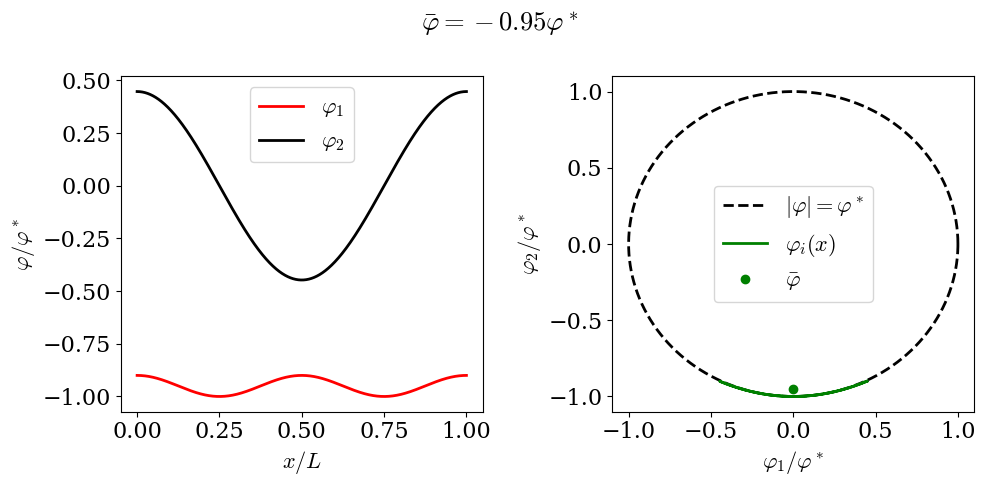

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
L = 1
xx = np.linspace(0, L, 1000)
dd = .95
f1 = lambda x : (1 - dd) * np.cos(2 * x *(2*np.pi/L)) - dd
f2 = lambda x : 2 * np.sqrt(1 * (1 - dd)) * np.cos(x*(2*np.pi/L))

ax[0].plot(xx, f1(xx), "r", label="$\\varphi_1$")
ax[0].plot(xx, f2(xx), "k", label="$\\varphi_2$")
ax[0].legend()
ax[0].set_xlabel("$x/L$")
ax[0].set_ylabel("$\\varphi/\\varphi^*$")

ax[1].plot(np.cos(xx*(2*np.pi/L)), np.sin(xx*(2*np.pi/L)), "k--", label="$|\\varphi| = \\varphi^*$")
ax[1].plot(f2(xx), f1(xx), 'g', label="$\\varphi_i(x)$")
ax[1].plot(0, -dd, "go", label="$\\bar\\varphi$")
ax[1].legend()
ax[1].set_xlabel("$\\varphi_1/\\varphi^*$")
ax[1].set_ylabel("$\\varphi_2/\\varphi^*$")

fig.suptitle(f"$\\bar\\varphi = -{ dd }\\varphi^*$")
plt.tight_layout()
plt.show()
fig.savefig("../done/fig/sol2.svg")


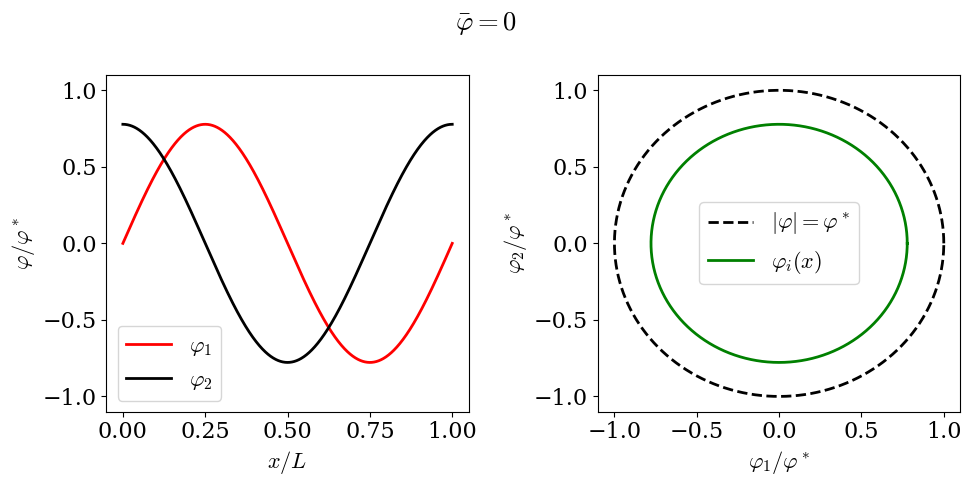

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
L = 10
xx = np.linspace(0, L, 1000)
r = -1
u = 1
k = 2 * np.pi / L 
A = np.sqrt((-r - k**2 ) / u) 
f1 = lambda x : A * np.sin(x *k ) 
f2 = lambda x : A * np.cos(x*k)

ax[0].plot(xx/L, f1(xx), "r", label="$\\varphi_1$")
ax[0].plot(xx/L, f2(xx), "k", label="$\\varphi_2$")
ax[0].legend()
ax[0].set_xlabel("$x/L$")
ax[0].set_ylabel("$\\varphi/\\varphi^*$")

ax[1].plot(np.cos(xx*(2*np.pi/L)), np.sin(xx*(2*np.pi/L)), "k--", label="$|\\varphi| = \\varphi^*$")
ax[1].plot(f2(xx), f1(xx), 'g', label="$\\varphi_i(x)$")
ax[1].legend()
ax[1].set_xlabel("$\\varphi_1/\\varphi^*$")
ax[1].set_ylabel("$\\varphi_2/\\varphi^*$")

ax[0].set_yticks([-1, -0.5, 0, 0.5, 1])
ax[0].set_ylim(-1.1, 1.1)
fig.suptitle(f"$\\bar\\varphi = 0$")
plt.tight_layout()
fig.savefig("../done/fig/sol1.svg" ,bbox_inches='tight')
plt.show()

In [4]:
r, th, A, B, phb, u, d = symbols('r, \\theta, A, B, \\bar\\varphi, u, \\delta')
k, x, t, w = symbols('k, x, t, \\omega')
ph = k * x
phs = sqrt(-r /u)
p1 = d * sp.cos(2 * ph) - phb
p2 = 2 * sqrt(phb*d) * sp.cos(ph)

In [5]:
p1

-\bar\varphi + \delta*cos(2*k*x)

In [6]:
p2

2*sqrt(\bar\varphi*\delta)*cos(k*x)

In [7]:
psq = expand(p1**2 + p2**2)
psq

\bar\varphi**2 + 4*\bar\varphi*\delta*cos(k*x)**2 - 2*\bar\varphi*\delta*cos(2*k*x) + \delta**2*cos(2*k*x)**2

In [8]:
eq1 = - diff(p1, t) \
    + diff(diff( 
        r * p1 \
        - simplify(diff(diff(p1, x), x))
        + u * simplify(p1**2 + p2**2)*p1
    ,x ), x)
eq1 = expand(eq1)
eq1

-8*\bar\varphi**2*\delta*k**2*u*sin(k*x)**2 + 8*\bar\varphi**2*\delta*k**2*u*cos(k*x)**2 - 12*\bar\varphi**2*\delta*k**2*u*cos(2*k*x) + 8*\bar\varphi*\delta**2*k**2*u*sin(k*x)**2*cos(2*k*x) + 32*\bar\varphi*\delta**2*k**2*u*sin(k*x)*sin(2*k*x)*cos(k*x) - 24*\bar\varphi*\delta**2*k**2*u*sin(2*k*x)**2 - 24*\bar\varphi*\delta**2*k**2*u*cos(k*x)**2*cos(2*k*x) + 24*\bar\varphi*\delta**2*k**2*u*cos(2*k*x)**2 + 24*\delta**3*k**2*u*sin(2*k*x)**2*cos(2*k*x) - 12*\delta**3*k**2*u*cos(2*k*x)**3 - 16*\delta*k**4*cos(2*k*x) - 4*\delta*k**2*r*cos(2*k*x)

In [9]:
trigsimp(eq1)

4*\delta*k**2*(2*\bar\varphi**2*u*sin(k*x)**2 - \bar\varphi**2*u + 16*\bar\varphi*\delta*u*sin(k*x)**4 - 12*\bar\varphi*\delta*u*sin(k*x)**2 + 72*\delta**2*u*sin(k*x)**6 - 108*\delta**2*u*sin(k*x)**4 + 42*\delta**2*u*sin(k*x)**2 - 3*\delta**2*u + 8*k**2*sin(k*x)**2 - 4*k**2 + 2*r*sin(k*x)**2 - r)